In [ ]:
from google.colab import drive
import pandas as pd
import io
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath
import urllib.request
import datetime
from collections import namedtuple

import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import DateFormatter

import matplotlib.dates as mdates


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Download All Time series data for 404 patients.
df_all404_withTemp = pd.read_csv('/content/gdrive/My Drive/Master thesis/df_ts_records_all404_patients_with_TEMP_SOFA.csv')
df_all404_withTemp['TIME'] =  pd.to_datetime(df_all404_withTemp['TIME'])

print(df_all404_withTemp.shape)
print(df_all404_withTemp.columns)




/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2530520, 18)
Index(['SUBJECT_ID', 'ICUSTAY_ID', 'RECORD', 'TIME', 'HR', 'SPO2', 'ABPSYS',
       'ABPDIAS', 'ABPMEAN', 'RESP', 'TEMP', 'SOFA_SCORE', 'RESP_SOFA',
       'LIVER_SOFA', 'RENAL_SOFA', 'CARDIO_SOFA', 'CNS_SOFA', 'COAG_SOFA'],
      dtype='object')


In [ ]:

print(df_all404_withTemp[df_all404_withTemp['SUBJECT_ID'].isin([
55563,
55731,
57239,
58269,
59076,
60083,
60409,
61984,
62160,
65689,
66213,
68589,
68789,
71164,
72269,
72350,
73471,
74630,
75582,
75830,
77188,
78459,
79619,
80105,
82127,
82159,
82629,
84505,
84734,
84837,
86782,
87247,
88186,
90012,
91284                                                     
])])

         SUBJECT_ID  ICUSTAY_ID                     RECORD                TIME  HR  SPO2  ABPSYS  ABPDIAS  ABPMEAN  RESP  TEMP  SOFA_SCORE  RESP_SOFA  LIVER_SOFA  RENAL_SOFA  CARDIO_SOFA  CNS_SOFA  COAG_SOFA
2017624       55563      295317  p055563-2157-11-30-14-41n 2157-11-30 14:32:41 NaN   NaN     NaN      NaN      NaN   NaN   NaN         4.0        NaN         NaN         4.0          NaN       0.0        NaN
2017625       55563      295317  p055563-2157-11-30-14-41n 2157-11-30 14:33:41 NaN   NaN     NaN      NaN      NaN   NaN   NaN         NaN        NaN         NaN         NaN          NaN       NaN        NaN
2017626       55563      295317  p055563-2157-11-30-14-41n 2157-11-30 14:34:41 NaN   NaN     NaN      NaN      NaN   NaN   NaN         NaN        NaN         NaN         NaN          NaN       NaN        NaN
2017627       55563      295317  p055563-2157-11-30-14-41n 2157-11-30 14:35:41 NaN   NaN     NaN      NaN      NaN   NaN   NaN         NaN        NaN         NaN       

#Plots on raw data as is taken from waveform dataset and clinical dataset for temp


['p040241-2192-03-15-12-20n' nan]


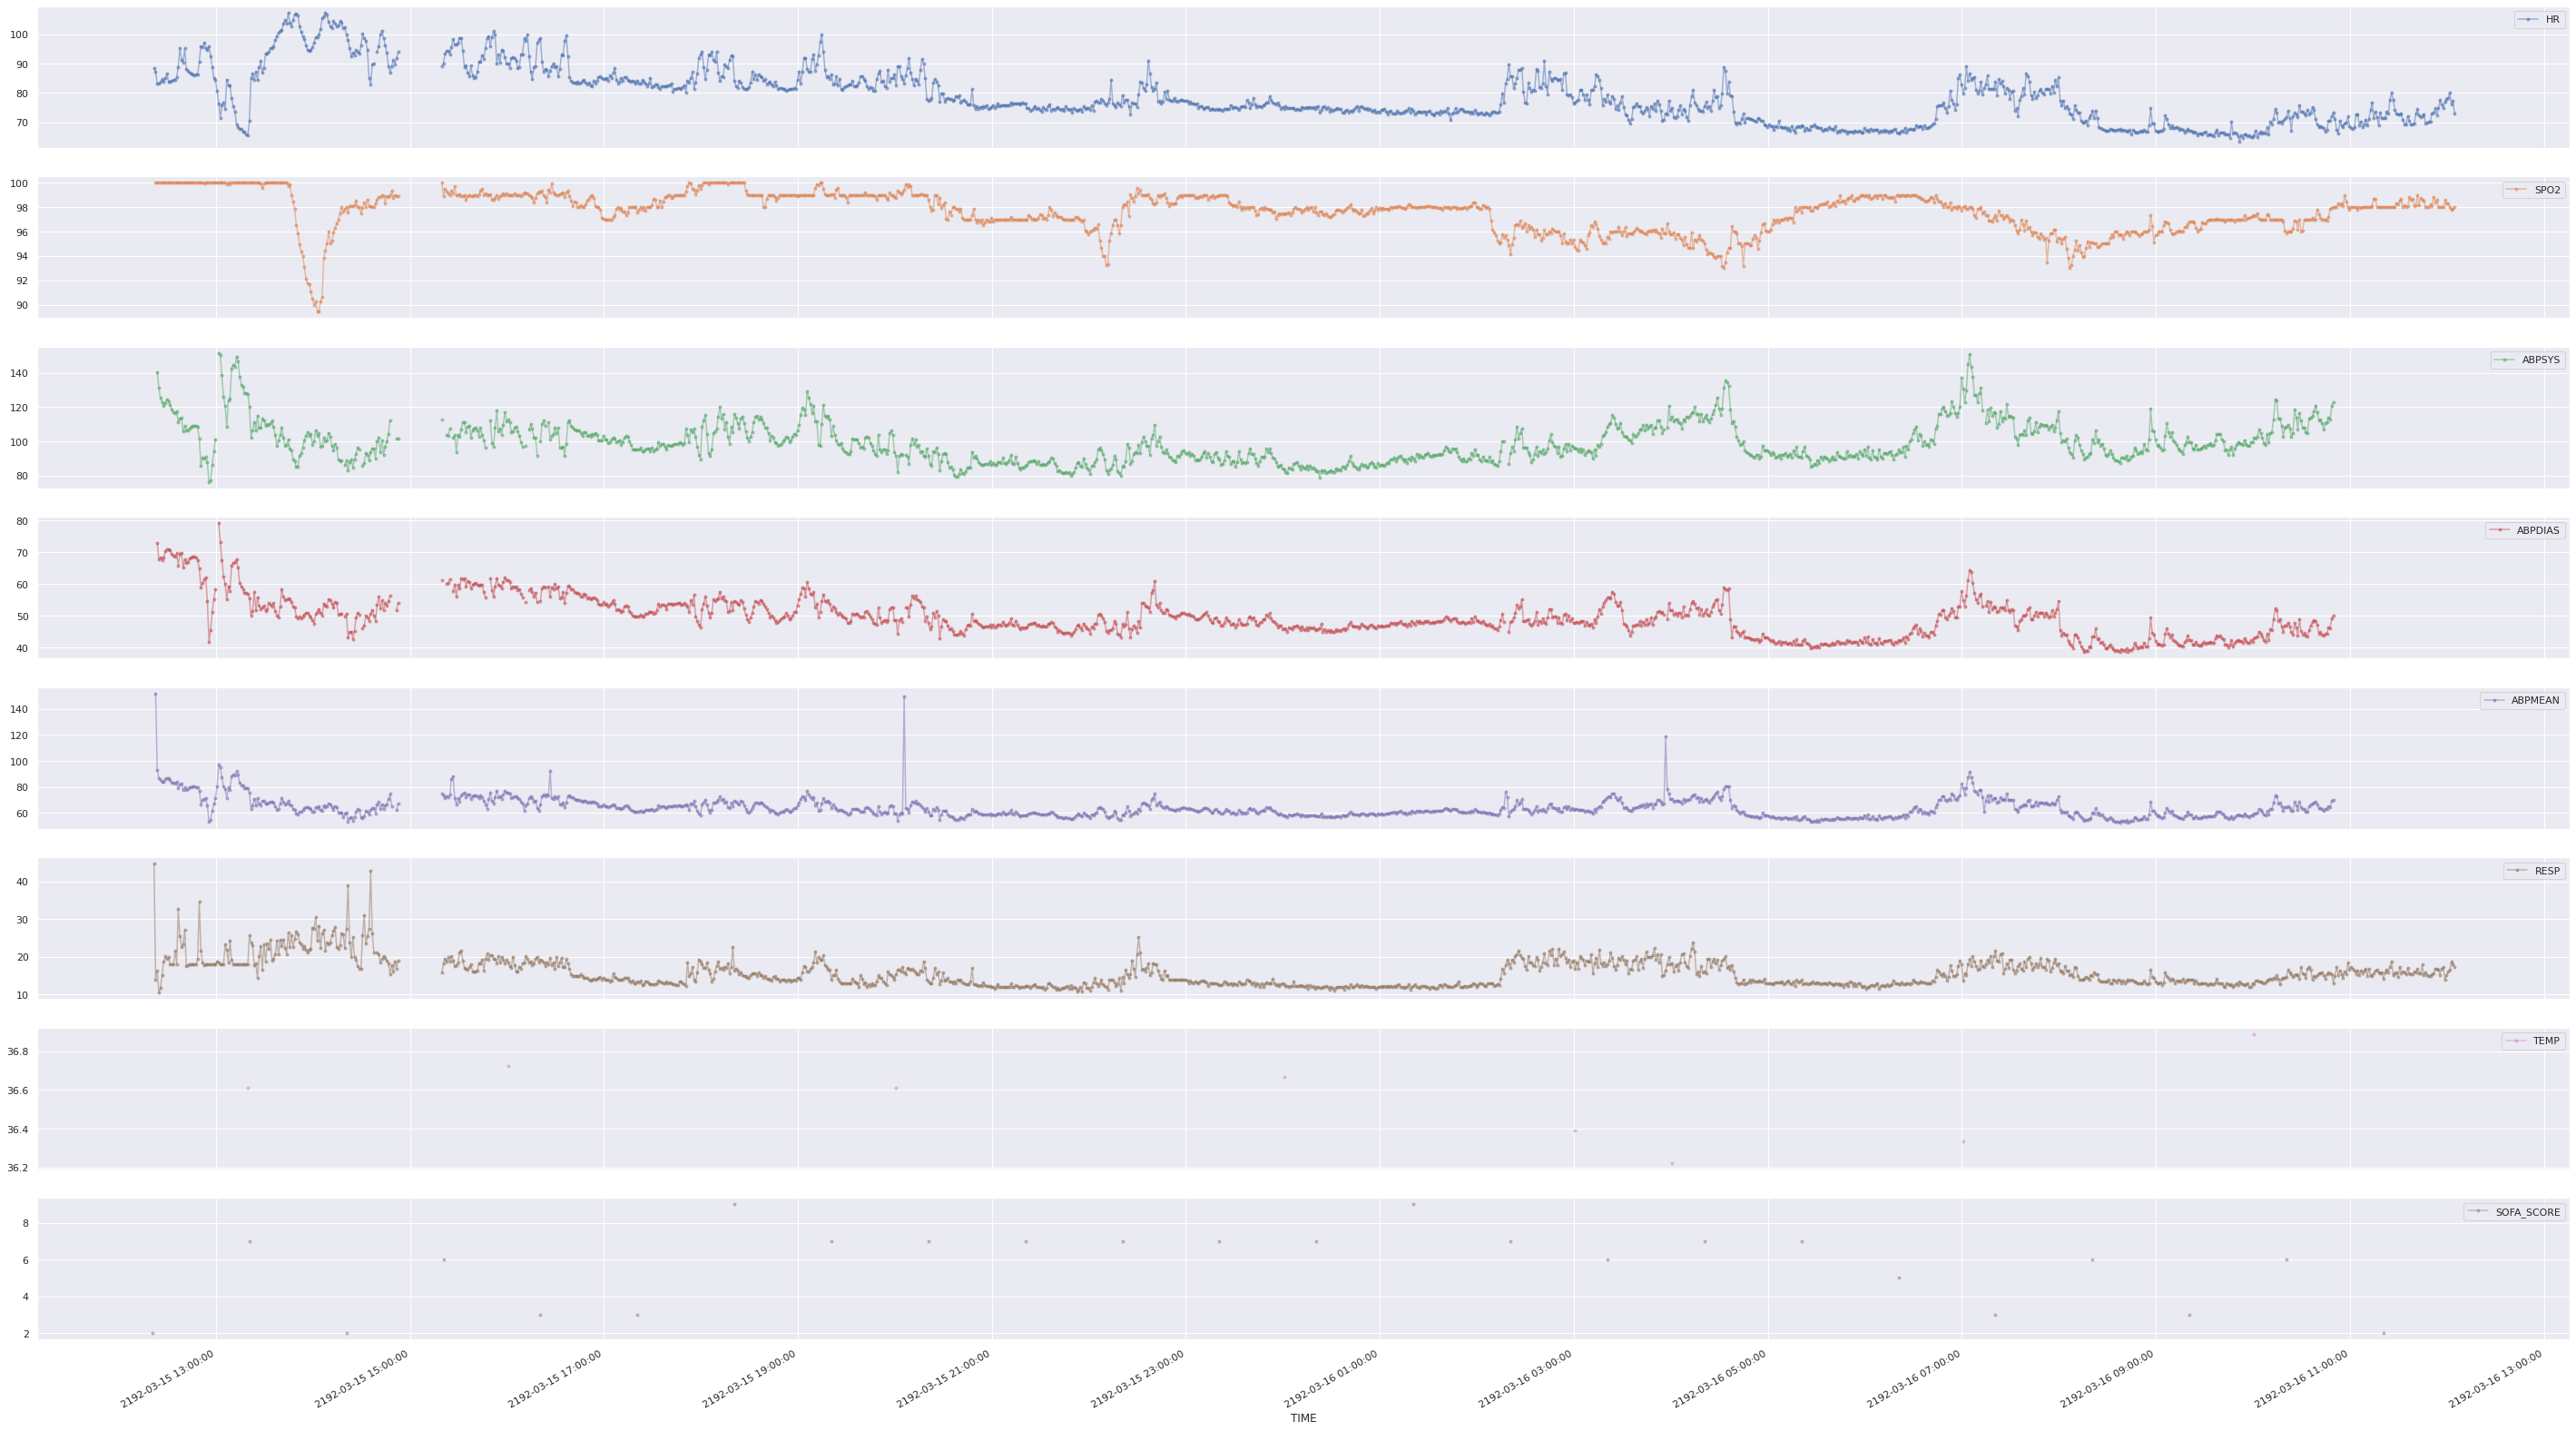

In [ ]:
# plot for a sample patient to check gaps


pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 800)


df_test = df_all404_withTemp[df_all404_withTemp['SUBJECT_ID']== 40241]  # 98930. 
# sepsis onset time for  subject id 40241: 2192-03-15 13:20:59.000000
#Non septic subjectids  55563, 72269

#print(df_test)
print(df_test.RECORD.unique())
#print(df_test[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP','TEMP']])

date_form = DateFormatter('%Y-%m-%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20, 10)})
cols_plot = ['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP', 'TEMP', 'SOFA_SCORE']
df_test = df_test.set_index('TIME')
ax = df_test[cols_plot].plot(marker='.', alpha = 0.5,figsize=(50, 30), subplots=True, x_compat=True)
#print(ax)
count =0 
for i in ax: 
  i.xaxis.set_major_formatter(date_form)
  i.xaxis.set_major_locator(mdates.HourLocator(interval=2))

from matplotlib import pyplot as plt

#plt.savefig('6singlasplot_subjectid_30582.png')


'\nfor i in ax: \n  i.xaxis.set_major_formatter(date_form)\n  i.xaxis.set_major_locator(mdates.HourLocator(interval=1)\n'

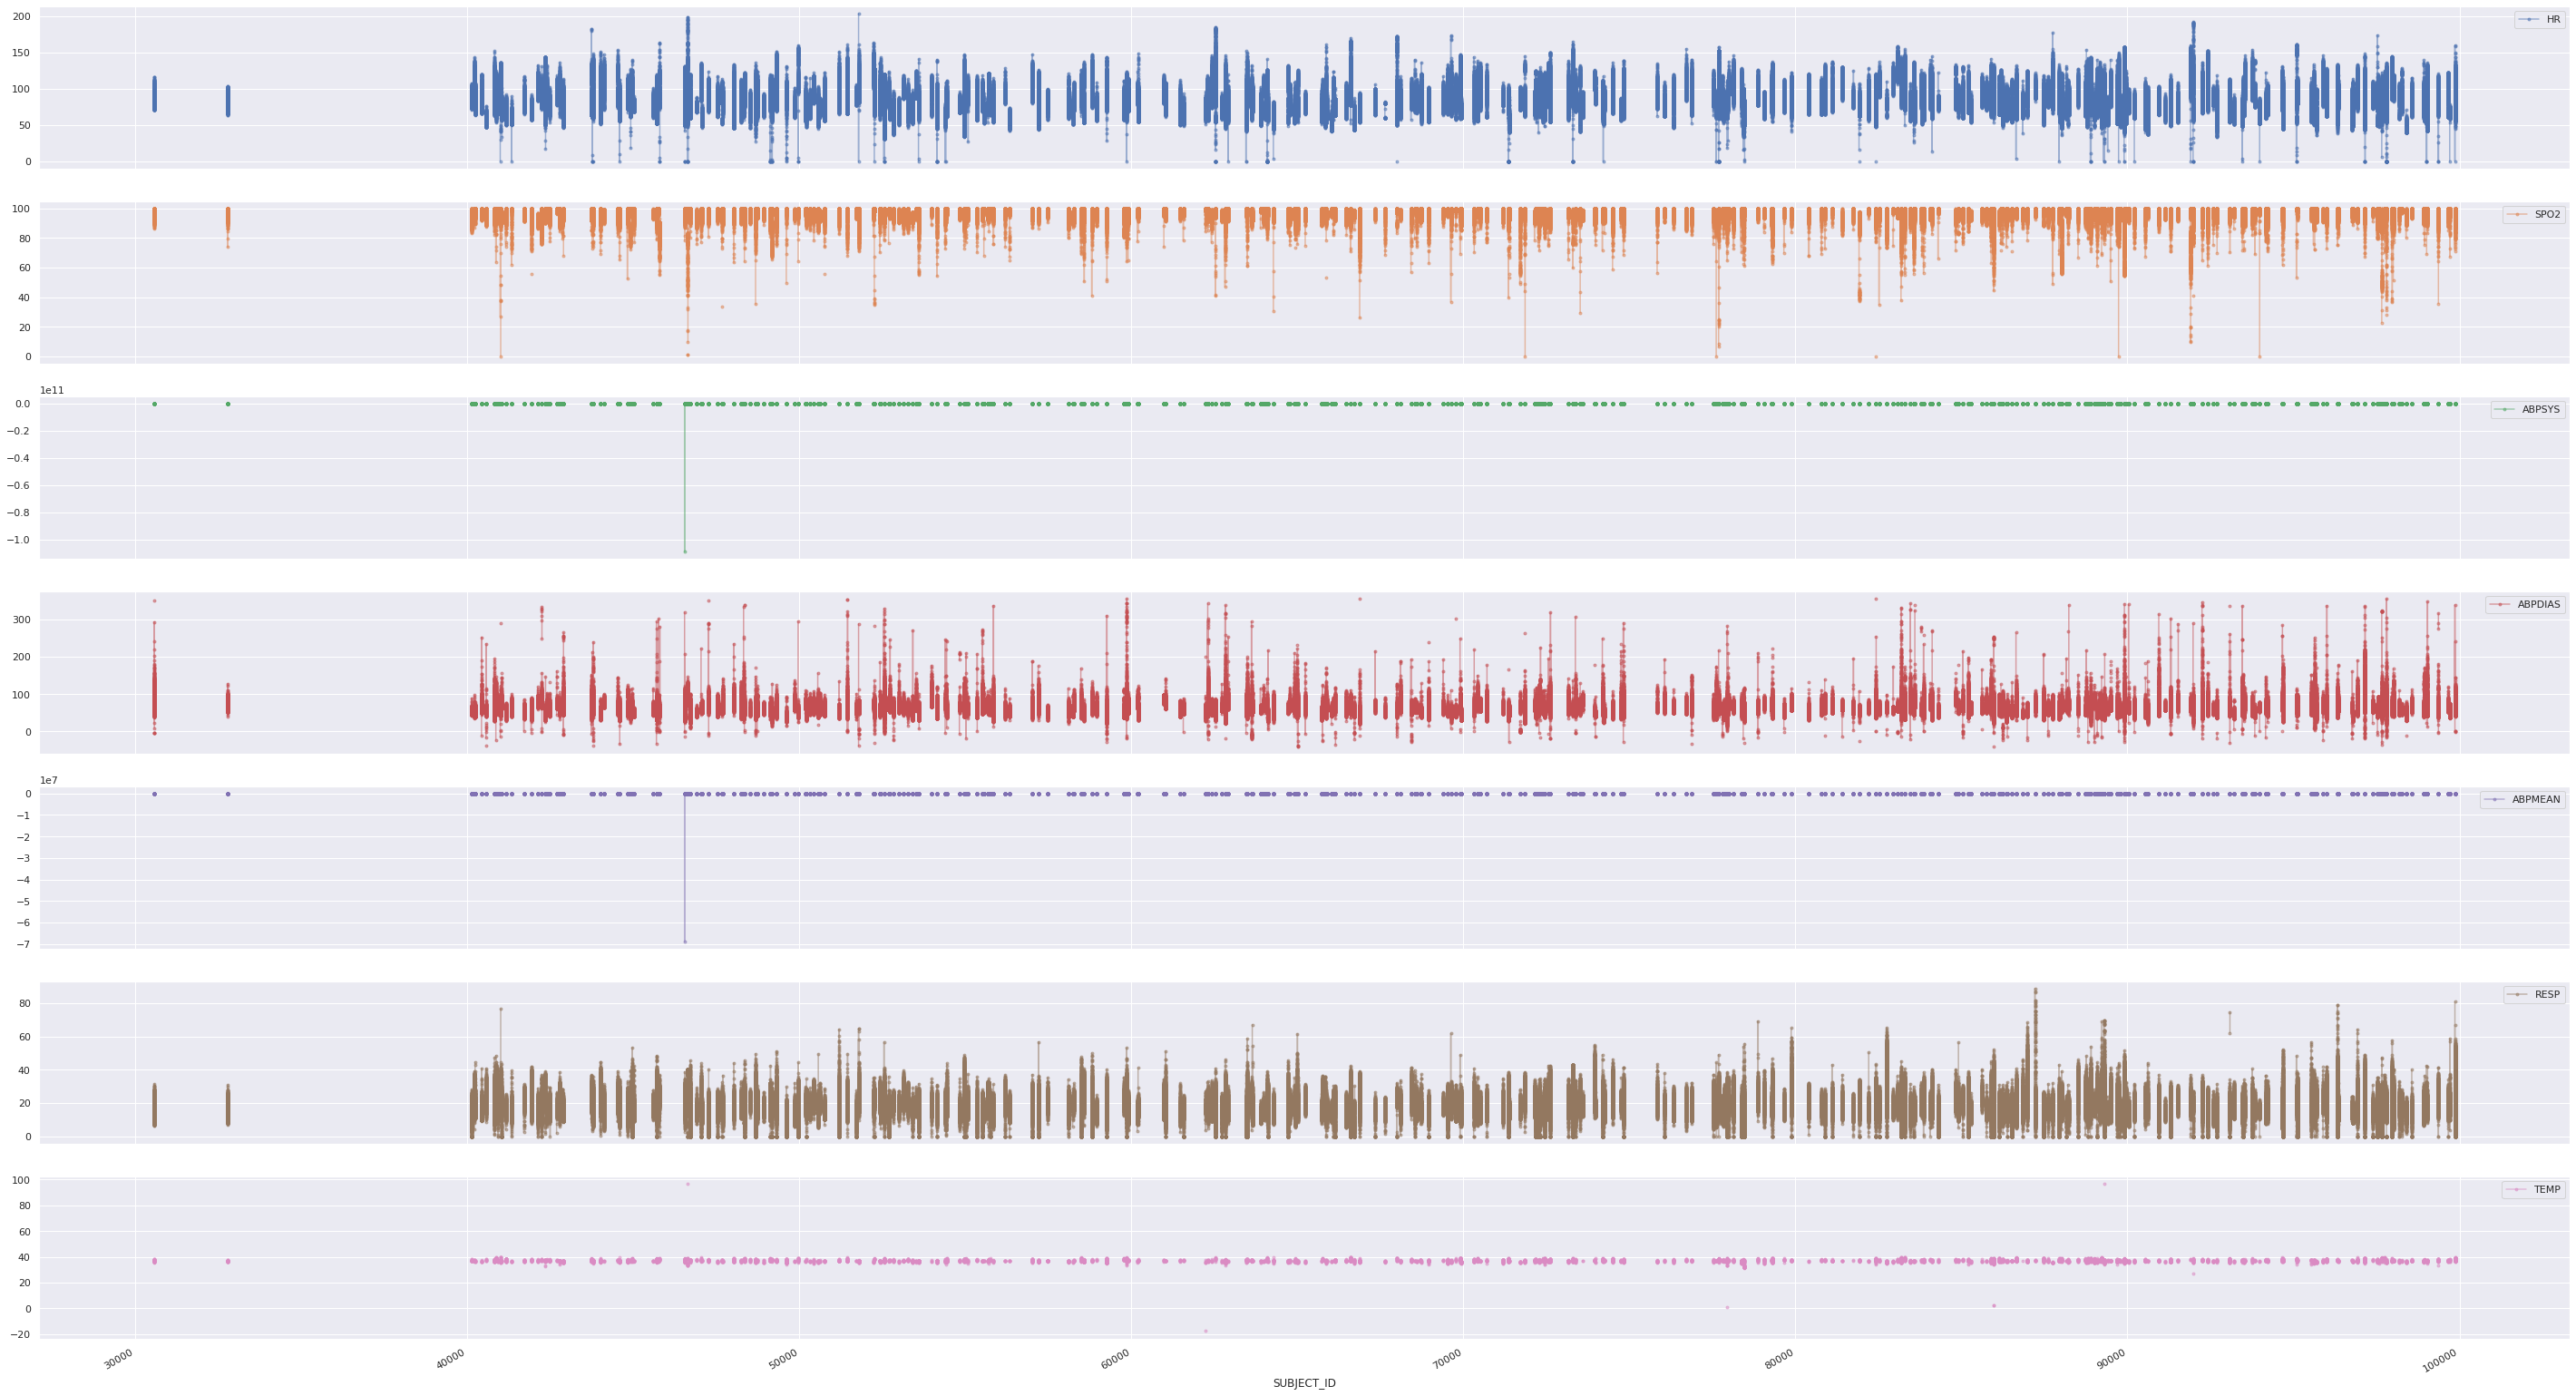

In [ ]:

df_test_allpatients = df_all404_withTemp
#print(df_test[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP','TEMP']])

date_form = DateFormatter('%Y-%m-%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20, 10)})
cols_plot = ['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP','TEMP']
df_test_allpatients = df_test_allpatients.set_index('SUBJECT_ID')
ax = df_test_allpatients[cols_plot].plot(marker='.', alpha = 0.5,figsize=(50, 30), subplots=True, x_compat=True)
#print(ax)
count =0 
"""
for i in ax: 
  i.xaxis.set_major_formatter(date_form)
  i.xaxis.set_major_locator(mdates.HourLocator(interval=1)
"""

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<Figure size 720x360 with 0 Axes>

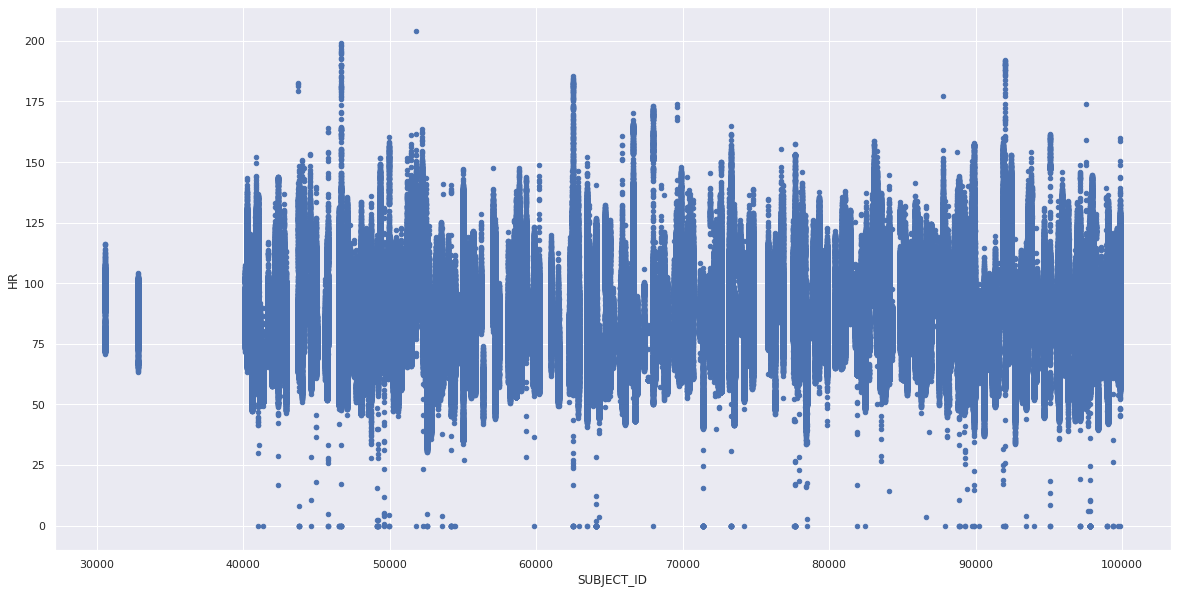

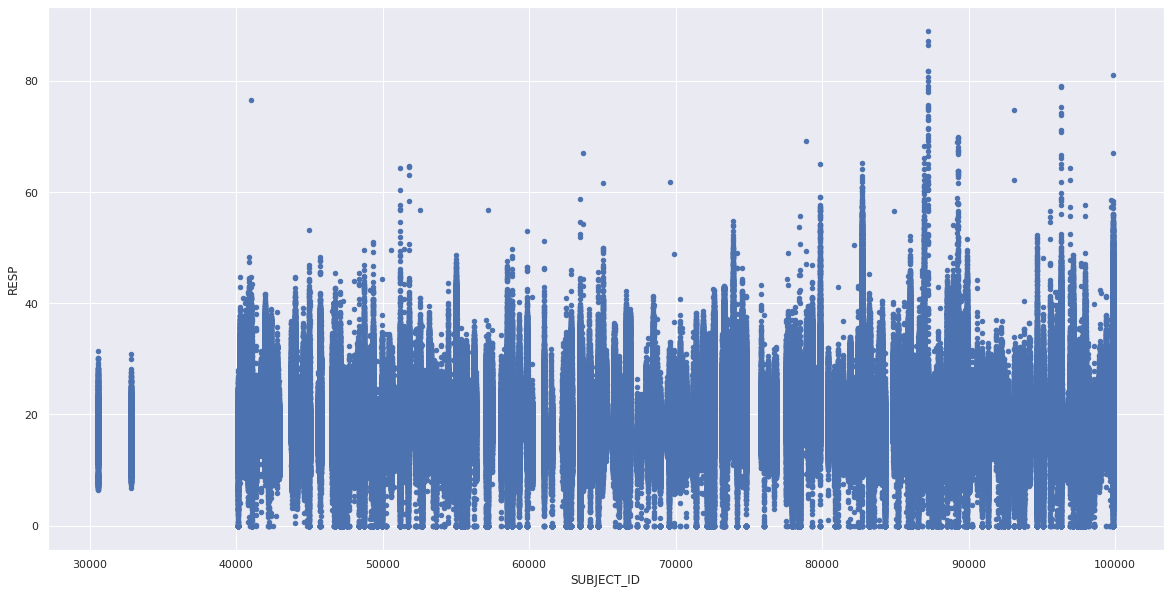

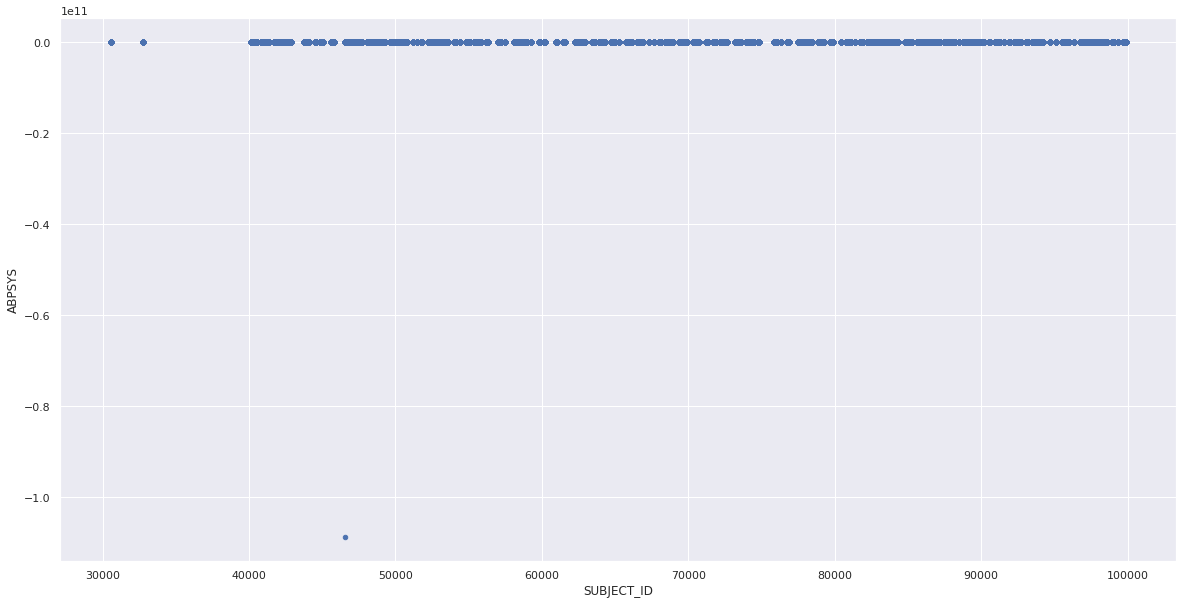

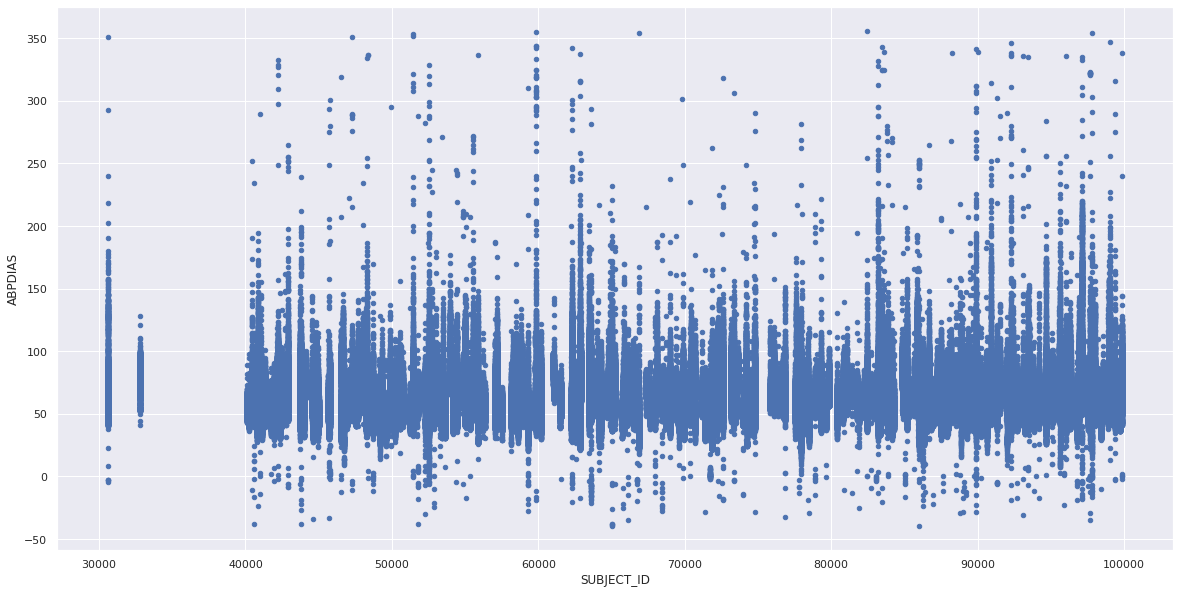

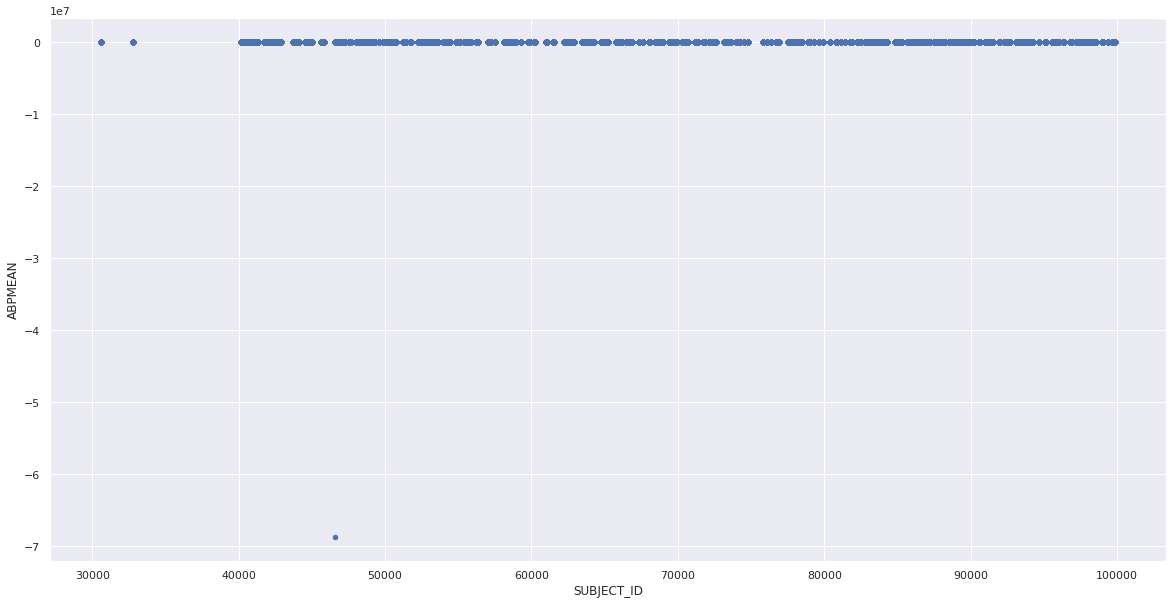

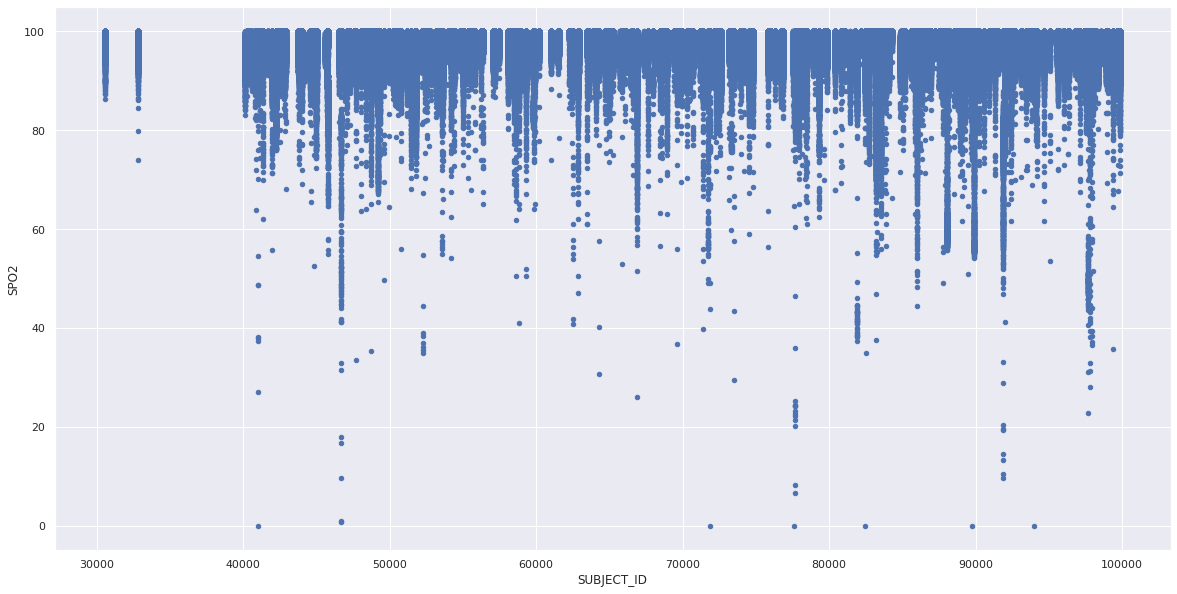

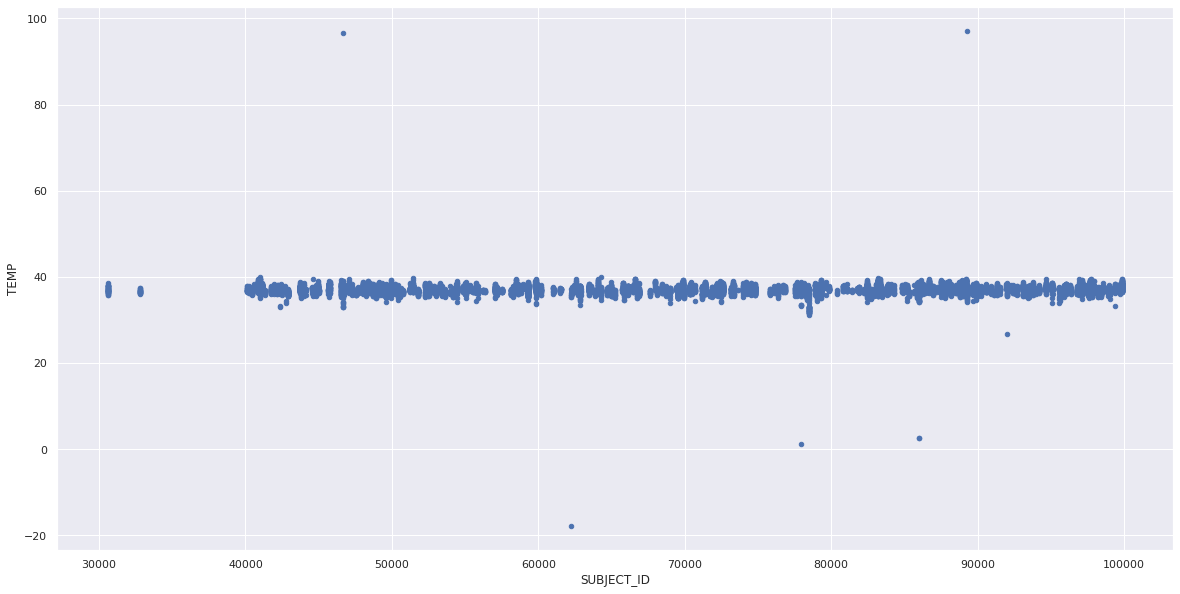

In [ ]:
#Scatter plot for HR, RESP, ABPSYS, ABPDIAS, ABPMEAN, SPO2, TEMP
plt.figure(figsize=(10,5))

df_scatterData = df_all404_withTemp
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='HR')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='RESP')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='ABPSYS')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='ABPDIAS')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='ABPMEAN')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='SPO2')
df_scatterData.plot(kind='scatter',x='SUBJECT_ID',y='TEMP')


plt.show()



p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: -0.022629796677320346
Skewness of  distribution: 0.30884907680638135


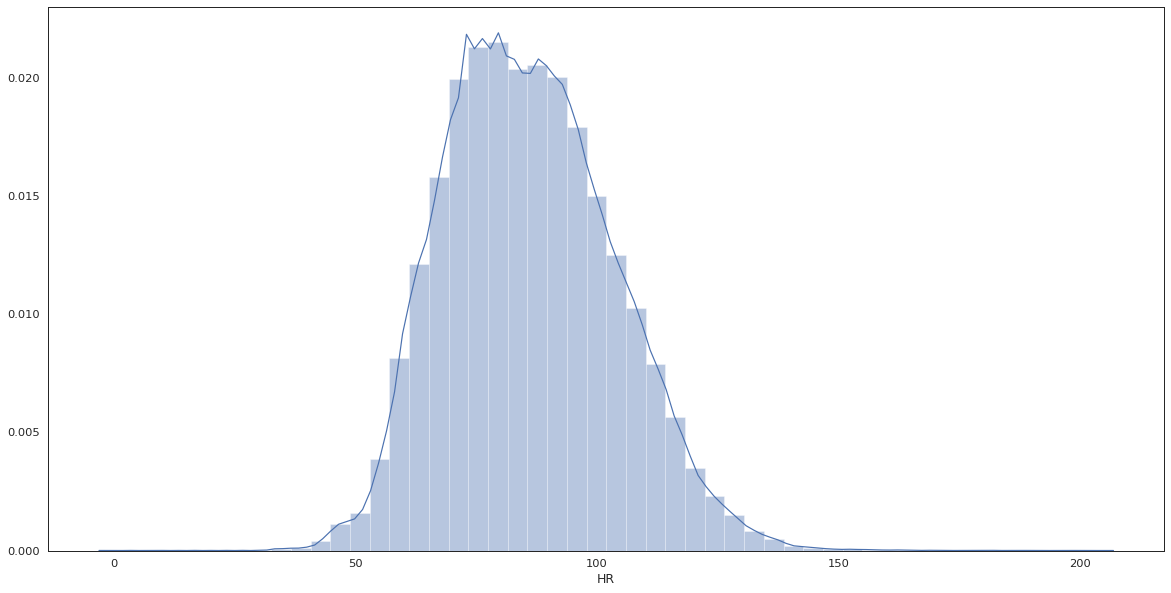

In [ ]:
# For checking distribution of HR

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_HR = df_all404_withTemp.dropna(subset=['HR']) 
stat, p = stats.normaltest(df_all404_withTemp_HR.HR)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_HR.HR);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_HR.HR)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_HR.HR)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 1.5652175391650687
Skewness of  distribution: 0.18962415420274029


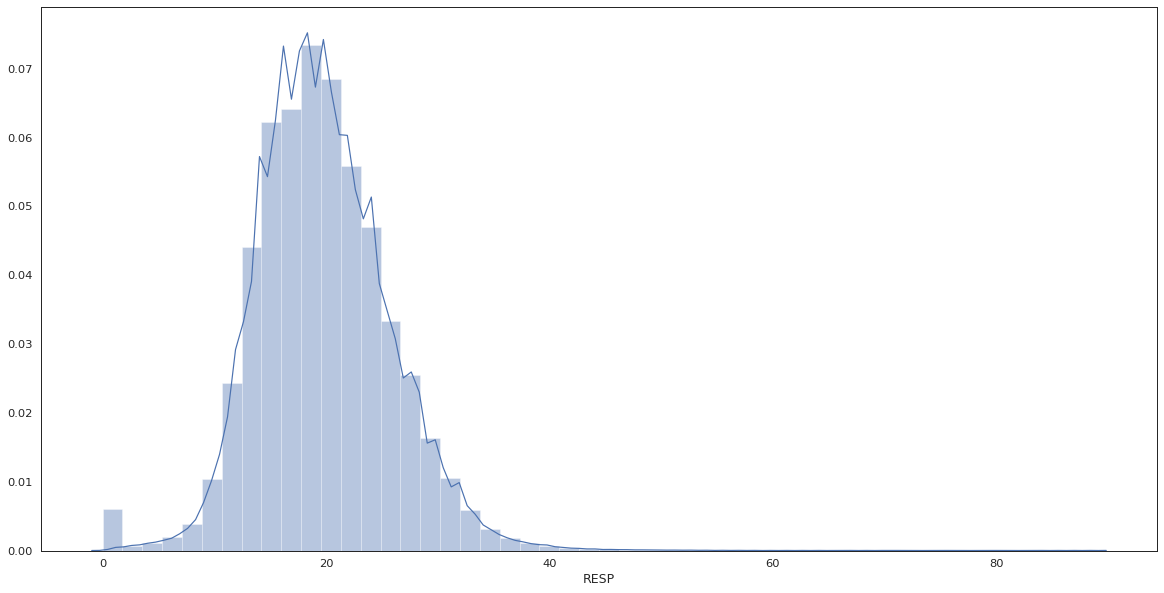

In [ ]:
# For checking distribution of RESP

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_RESP = df_all404_withTemp.dropna(subset=['RESP']) 
stat, p = stats.normaltest(df_all404_withTemp_RESP.RESP)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_RESP.RESP);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_RESP.RESP)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_RESP.RESP)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 1495582.0000004666
Skewness of  distribution: -1222.9407181054835


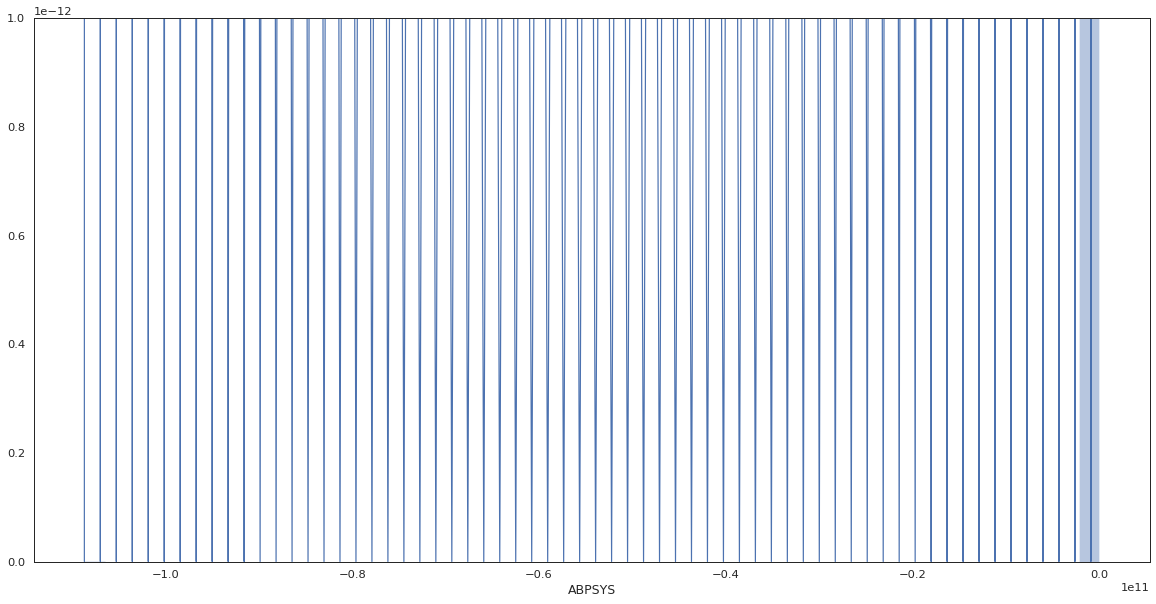

In [ ]:
# For checking distribution of ABPSYS

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_ABPSYS = df_all404_withTemp.dropna(subset=['ABPSYS']) 
stat, p = stats.normaltest(df_all404_withTemp_ABPSYS.ABPSYS)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_ABPSYS.ABPSYS);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_ABPSYS.ABPSYS)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_ABPSYS.ABPSYS)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 16.452351650081457
Skewness of  distribution: 1.8310448760306448


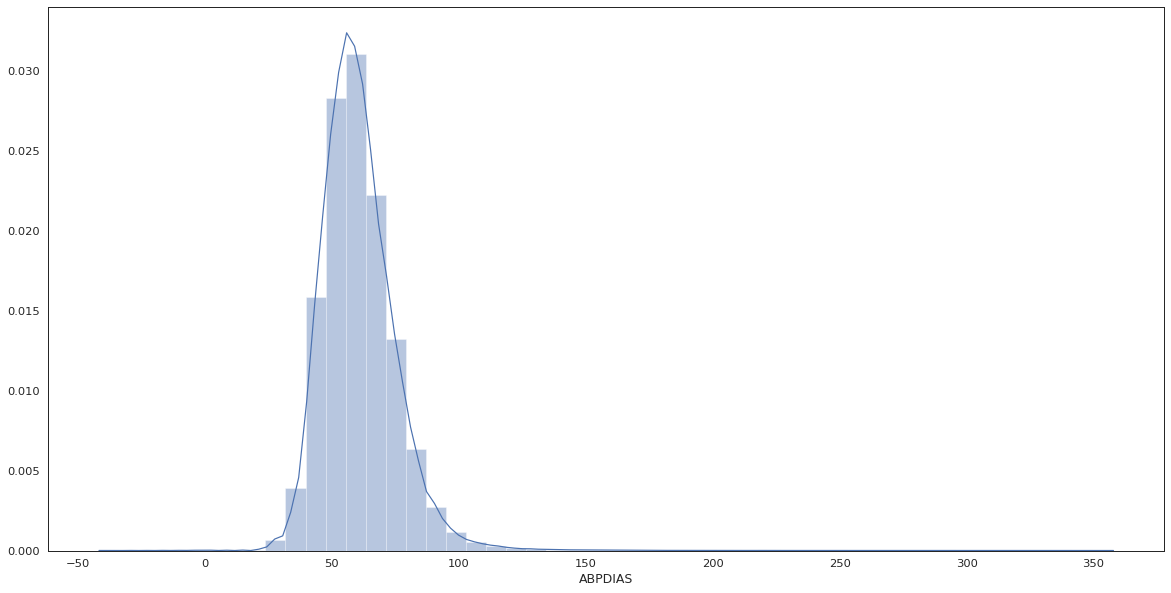

In [ ]:
# For checking distribution of ABPDIAS

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_ABPDIAS = df_all404_withTemp.dropna(subset=['ABPDIAS']) 
stat, p = stats.normaltest(df_all404_withTemp_ABPDIAS.ABPDIAS)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_ABPDIAS.ABPDIAS);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_ABPDIAS.ABPDIAS)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_ABPDIAS.ABPDIAS)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 1515223.6888209821
Skewness of  distribution: -1230.9449757120165


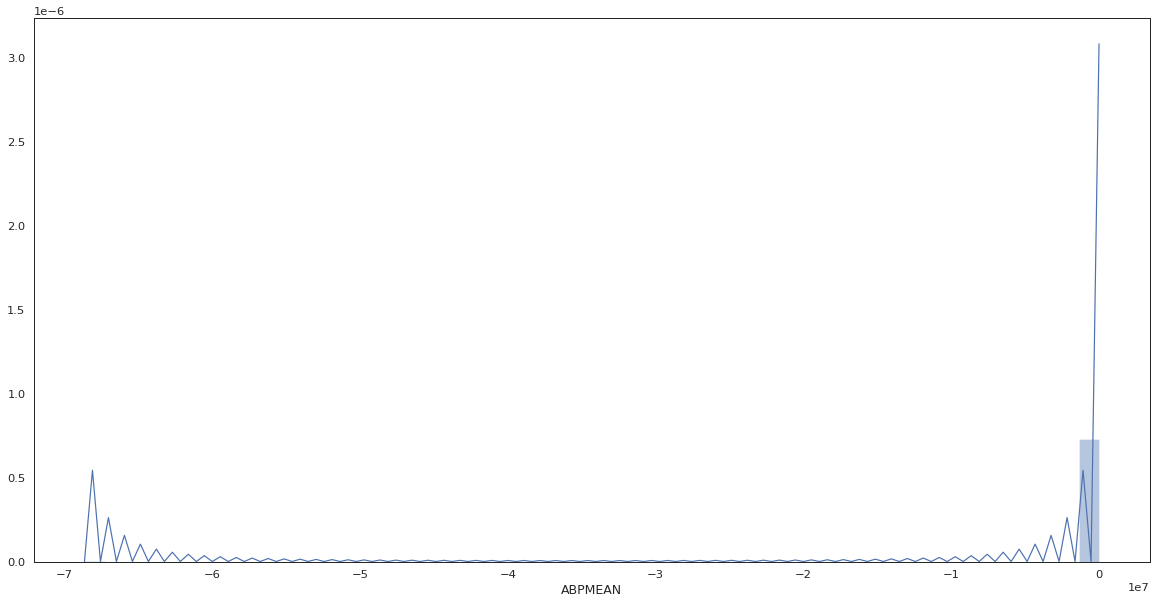

In [ ]:
# For checking distribution of ABPMEAN

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_ABPMEAN = df_all404_withTemp.dropna(subset=['ABPMEAN']) 
stat, p = stats.normaltest(df_all404_withTemp_ABPMEAN.ABPMEAN)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_ABPMEAN.ABPMEAN);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_ABPMEAN.ABPMEAN)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_ABPMEAN.ABPMEAN)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 48.271124888694786
Skewness of  distribution: -4.051964088239866


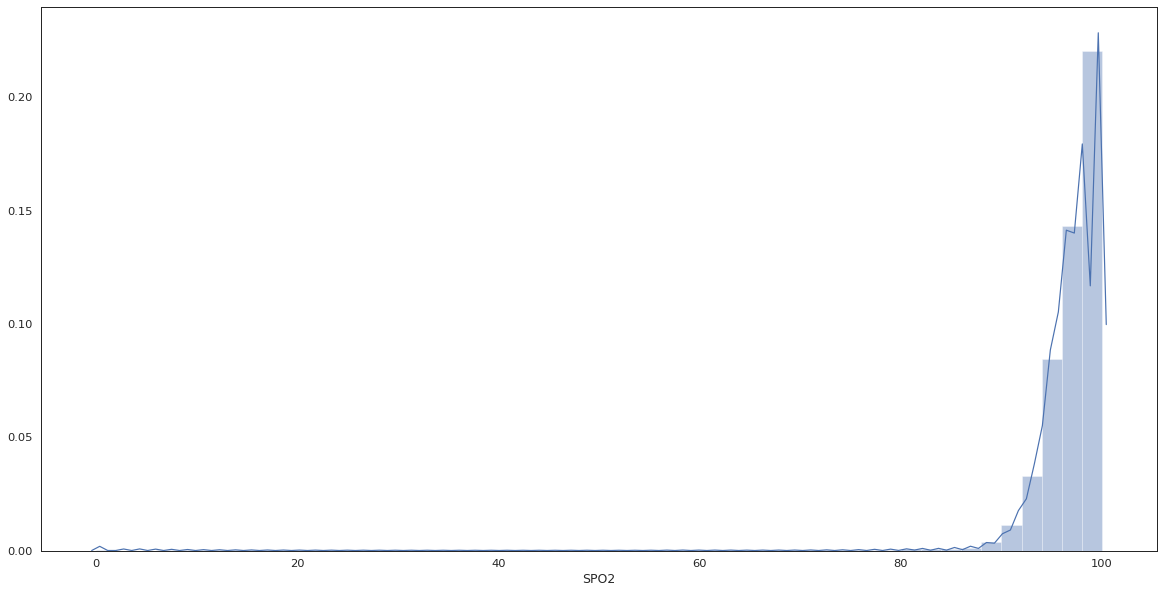

In [ ]:
# For checking distribution of SPO2

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_SPO2 = df_all404_withTemp.dropna(subset=['SPO2']) 
stat, p = stats.normaltest(df_all404_withTemp_SPO2.SPO2)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_SPO2.SPO2);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_SPO2.SPO2)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_SPO2.SPO2)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 987.066847548756
Skewness of  distribution: 4.277438209514532


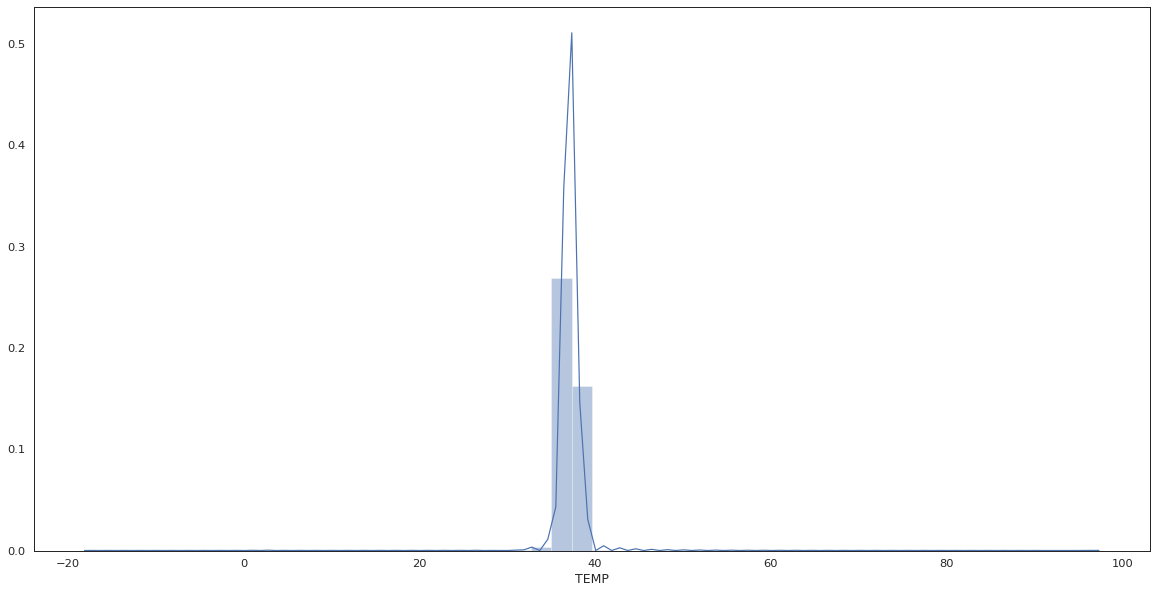

In [ ]:
 # For checking distribution of TEMP

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_TEMP = df_all404_withTemp.dropna(subset=['TEMP']) 
stat, p = stats.normaltest(df_all404_withTemp_TEMP.TEMP)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_TEMP.TEMP);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_TEMP.TEMP)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_TEMP.TEMP)))

#Plots on processed data i.e. cleaned and missing values imputed


In [ ]:
#cleaning data :  removing all negative values

df_all404_withTemp.HR = df_all404_withTemp.HR.mask(df_all404_withTemp.HR < 0)

df_all404_withTemp.RESP = df_all404_withTemp.RESP.mask(df_all404_withTemp.RESP < 0)

df_all404_withTemp.ABPSYS = df_all404_withTemp.ABPSYS.mask(df_all404_withTemp.ABPSYS < 0)

df_all404_withTemp.ABPDIAS = df_all404_withTemp.ABPDIAS.mask(df_all404_withTemp.ABPDIAS < 0)

df_all404_withTemp.ABPMEAN = df_all404_withTemp.ABPMEAN.mask(df_all404_withTemp.ABPMEAN < 0)

df_all404_withTemp.SPO2 = df_all404_withTemp.SPO2.mask(df_all404_withTemp.SPO2 < 0)

df_all404_withTemp.TEMP = df_all404_withTemp.TEMP.mask(df_all404_withTemp.TEMP < 0)


# Missing value imputation by carry forward scheme

df_all404_withTemp_cleaned_MVimputed = df_all404_withTemp.ffill().bfill()

df_all404_withTemp_cleaned_MVimputed.HR = df_all404_withTemp_cleaned_MVimputed.HR.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.RESP = df_all404_withTemp_cleaned_MVimputed.RESP.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.ABPSYS = df_all404_withTemp_cleaned_MVimputed.ABPSYS.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.ABPDIAS = df_all404_withTemp_cleaned_MVimputed.ABPDIAS.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.ABPMEAN = df_all404_withTemp_cleaned_MVimputed.ABPMEAN.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.SPO2 = df_all404_withTemp_cleaned_MVimputed.SPO2.round(decimals=4)
df_all404_withTemp_cleaned_MVimputed.TEMP = df_all404_withTemp_cleaned_MVimputed.TEMP.round(decimals=4)

df_all404_withTemp_cleaned_MVimputed['TIME'] =  pd.to_datetime(df_all404_withTemp_cleaned_MVimputed['TIME'])


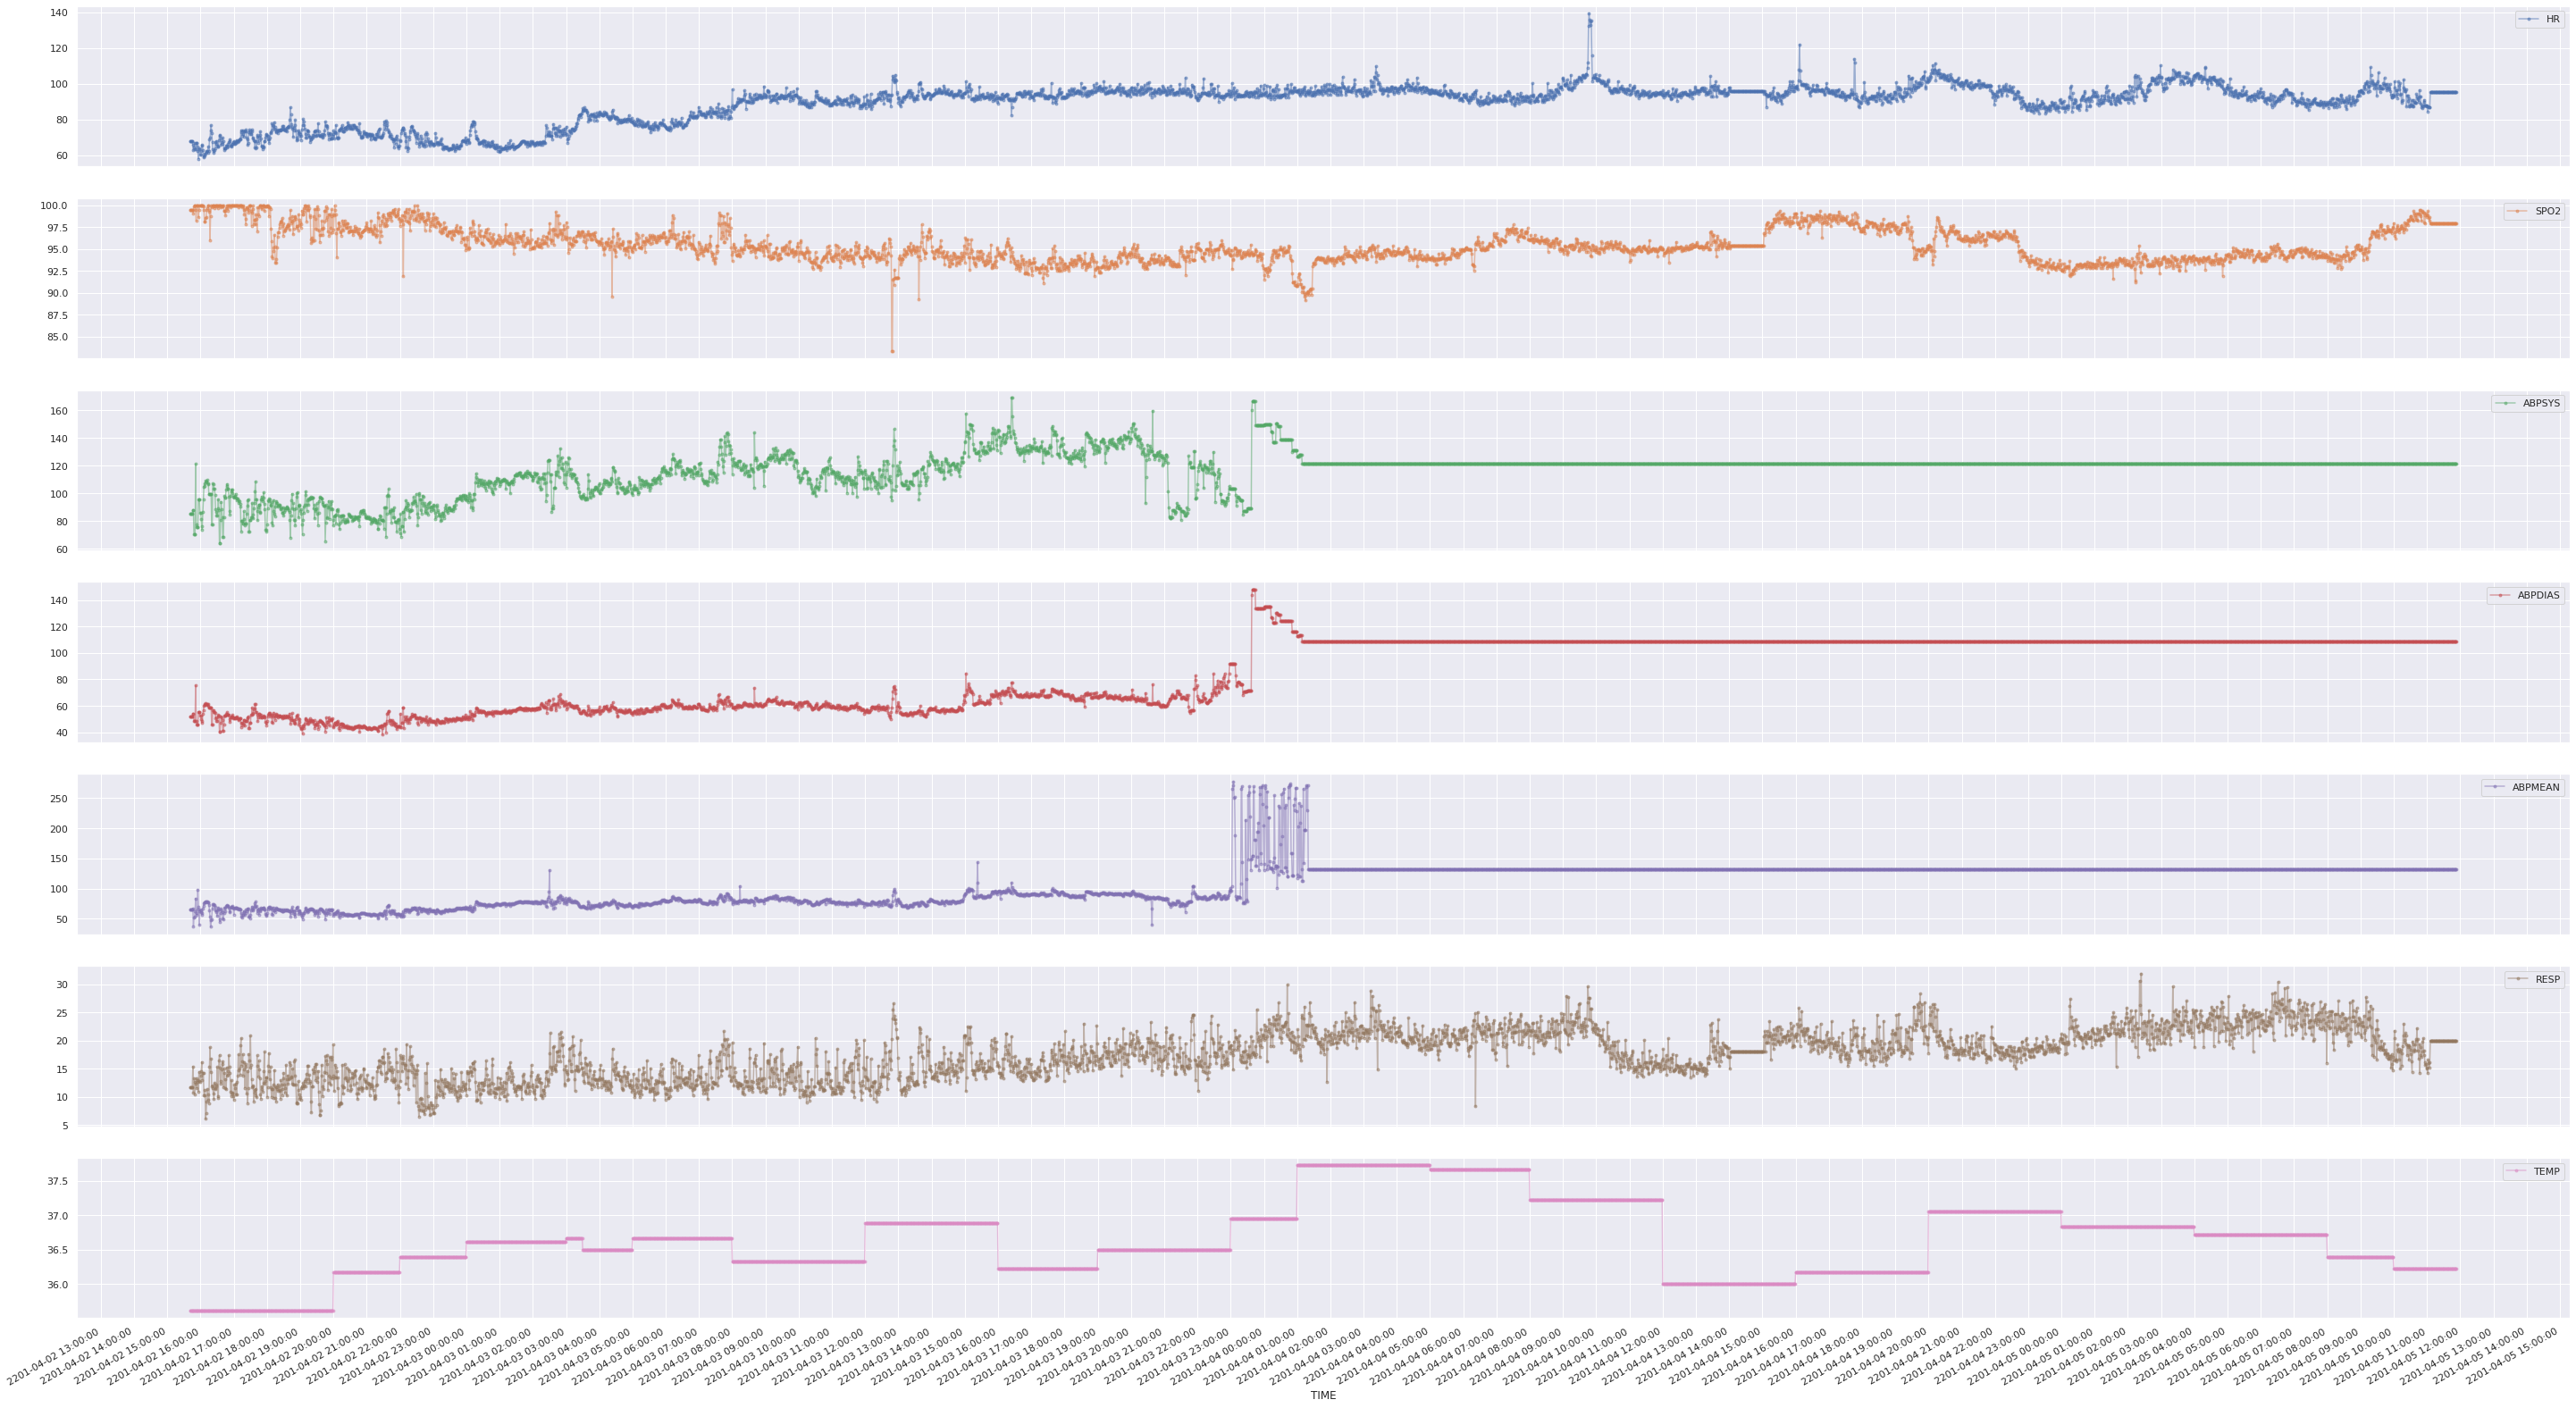

In [ ]:
# plot for a sample patient to check gaps

df_test = df_all404_withTemp_cleaned_MVimputed[df_all404_withTemp_cleaned_MVimputed['SUBJECT_ID']== 98930]
#print(df_test[['TIME','HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP','TEMP']])

date_form = DateFormatter('%Y-%m-%d %H:%M:%S')

sns.set(rc={'figure.figsize':(20, 10)})
cols_plot = ['HR', 'SPO2','ABPSYS','ABPDIAS','ABPMEAN','RESP','TEMP']
df_test = df_test.set_index('TIME')
ax = df_test[cols_plot].plot(marker='.', alpha = 0.5,figsize=(50, 30), subplots=True, x_compat=True)
#print(ax)
count =0 
for i in ax: 
  i.xaxis.set_major_formatter(date_form)
  i.xaxis.set_major_locator(mdates.HourLocator(interval=1))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<Figure size 720x360 with 0 Axes>

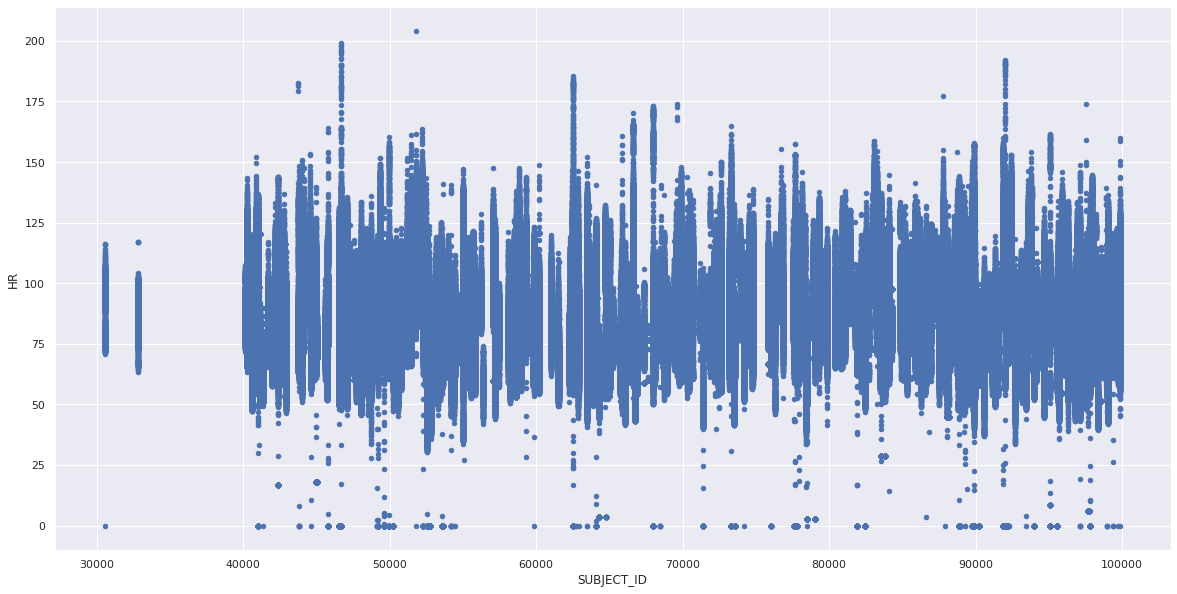

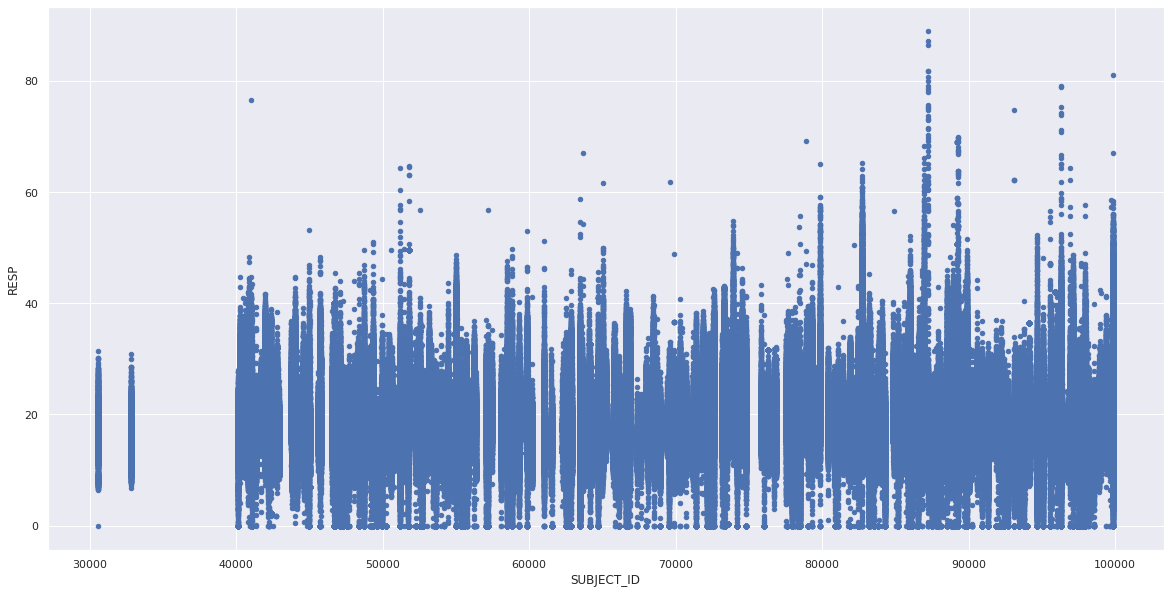

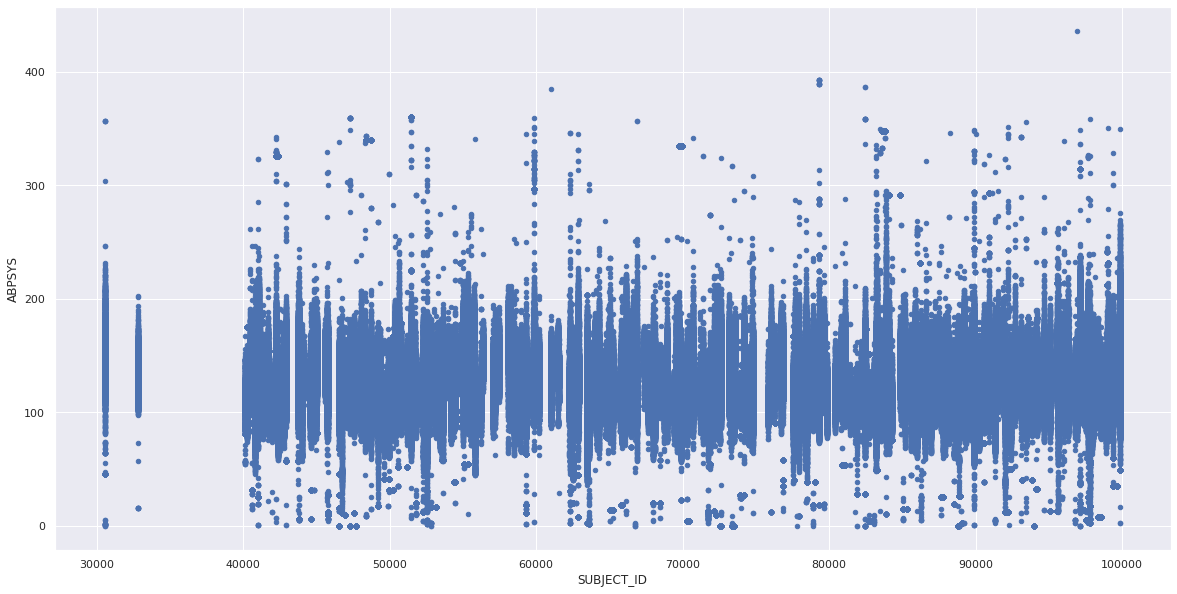

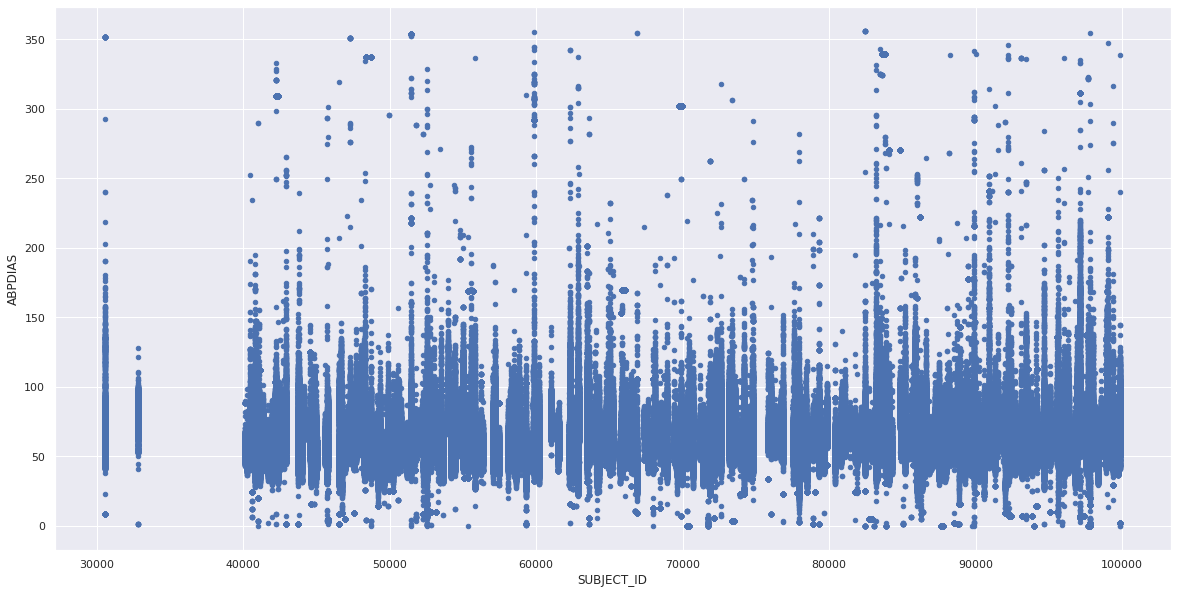

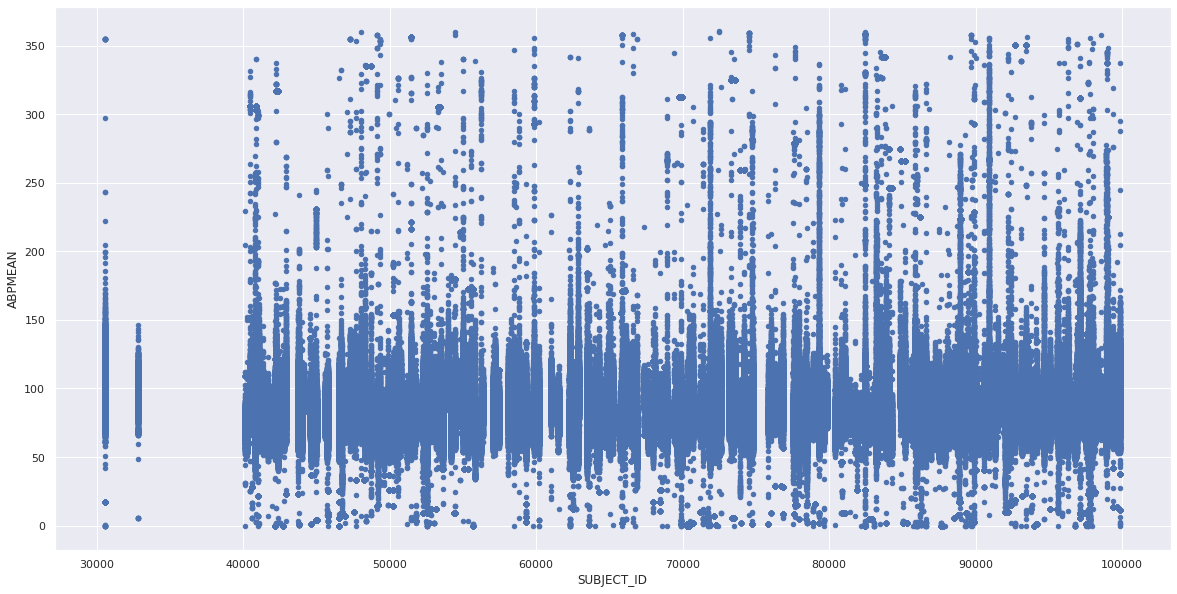

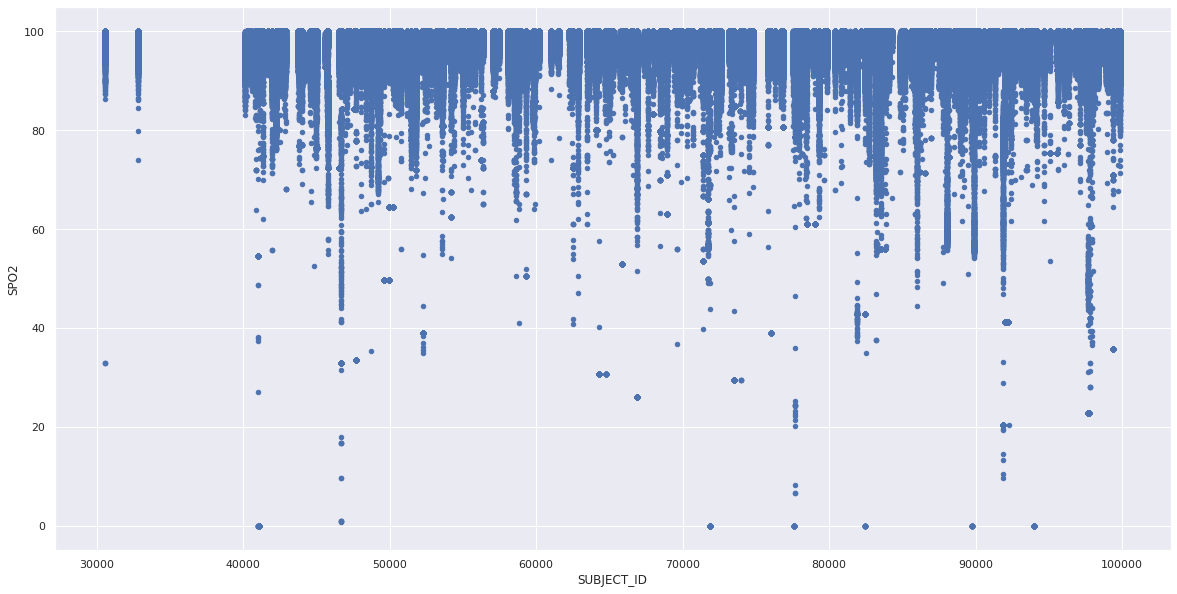

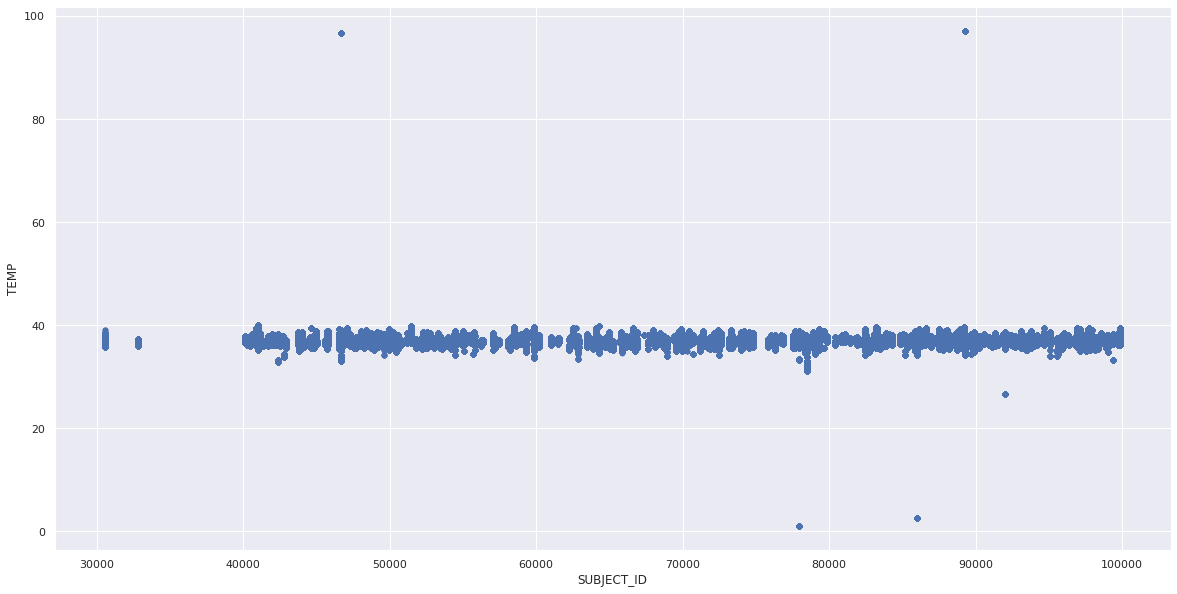

In [ ]:
#Scatter plot for HR, RESP, ABPSYS, ABPDIAS, ABPMEAN, SPO2, TEMP
plt.figure(figsize=(10,5))

df_scatterData_prosessed = df_all404_withTemp_cleaned_MVimputed
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='HR')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='RESP')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='ABPSYS')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='ABPDIAS')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='ABPMEAN')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='SPO2')
df_scatterData_prosessed.plot(kind='scatter',x='SUBJECT_ID',y='TEMP')


plt.show()


p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 0.9026046437208963
Skewness of  distribution: -0.0738064607391376


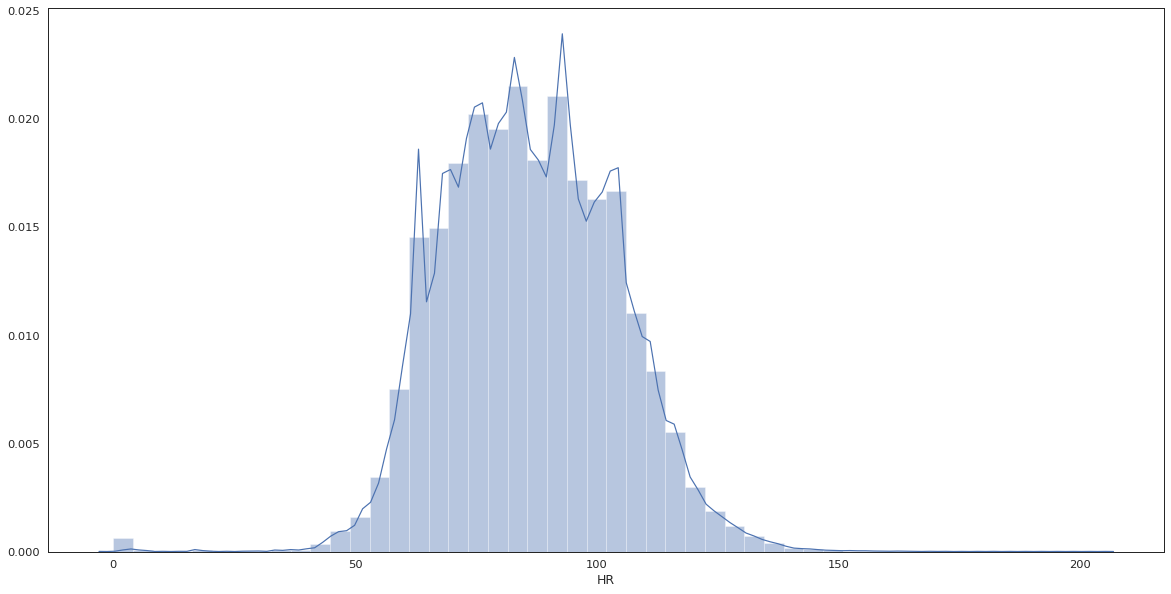

In [ ]:
# For checking distribution of HR

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_HR = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['HR']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_HR.HR)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_HR.HR);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_HR.HR)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_HR.HR)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 1.3499099288418606
Skewness of  distribution: 0.09626273882534929


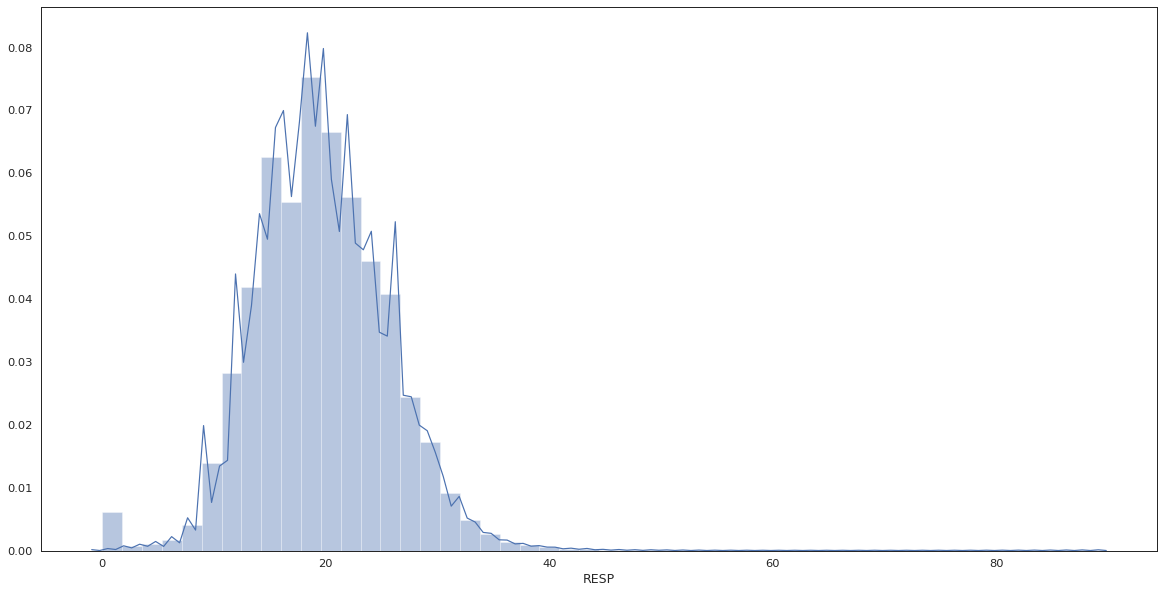

In [ ]:
# For checking distribution of RESP

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_RESP = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['RESP']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_RESP.RESP)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_RESP.RESP);
print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_RESP.RESP)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_RESP.RESP)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 4.579870550961572
Skewness of  distribution: -0.46151095621810057


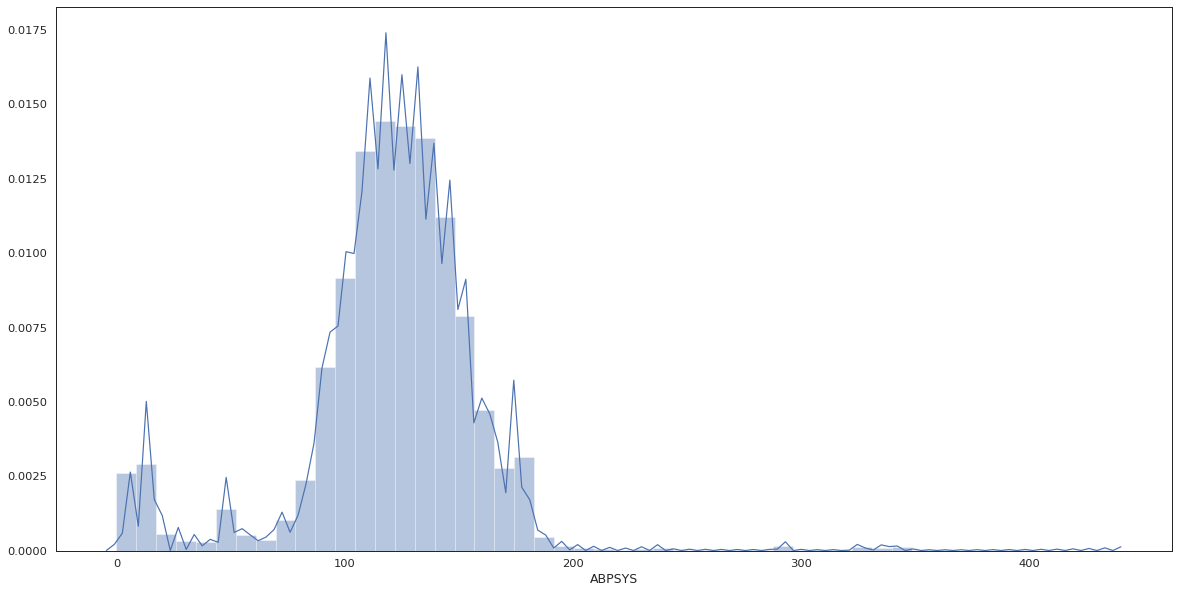

In [ ]:
# For checking distribution of ABPSYS

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_ABPSYS = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['ABPSYS']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_ABPSYS.ABPSYS)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_ABPSYS.ABPSYS);

print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPSYS.ABPSYS)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPSYS.ABPSYS)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 36.302533181437816
Skewness of  distribution: 3.800308787748752


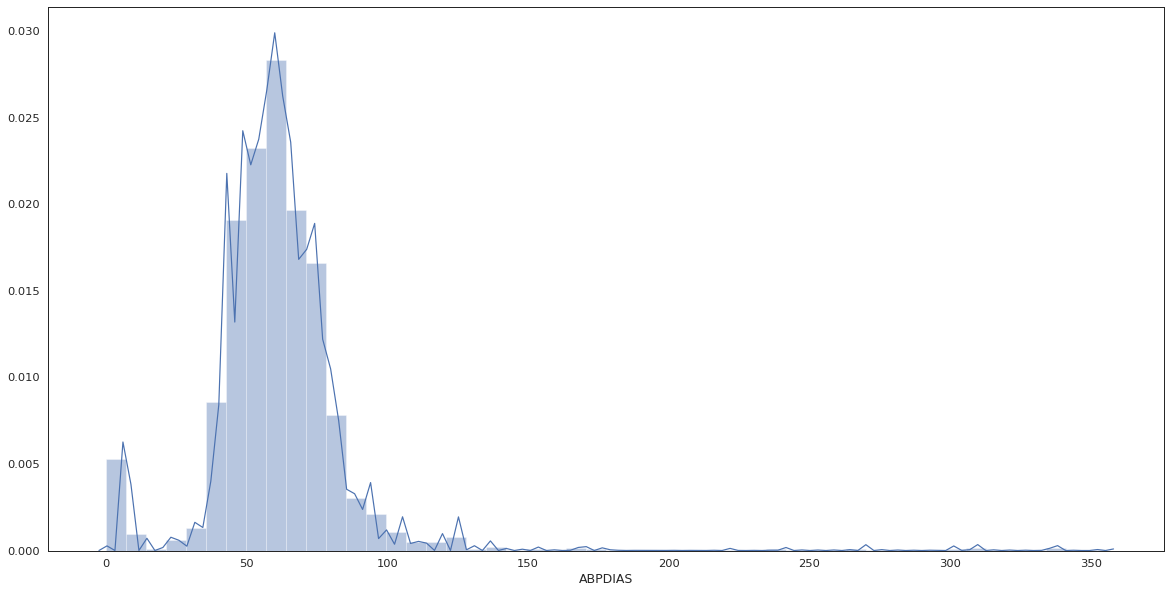

In [ ]:
# For checking distribution of ABPDIAS

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_ABPDIAS = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['ABPDIAS']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_ABPDIAS.ABPDIAS)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_ABPDIAS.ABPDIAS);

print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPDIAS.ABPDIAS)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPDIAS.ABPDIAS)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 17.43558376257753
Skewness of  distribution: 2.8596705083571172


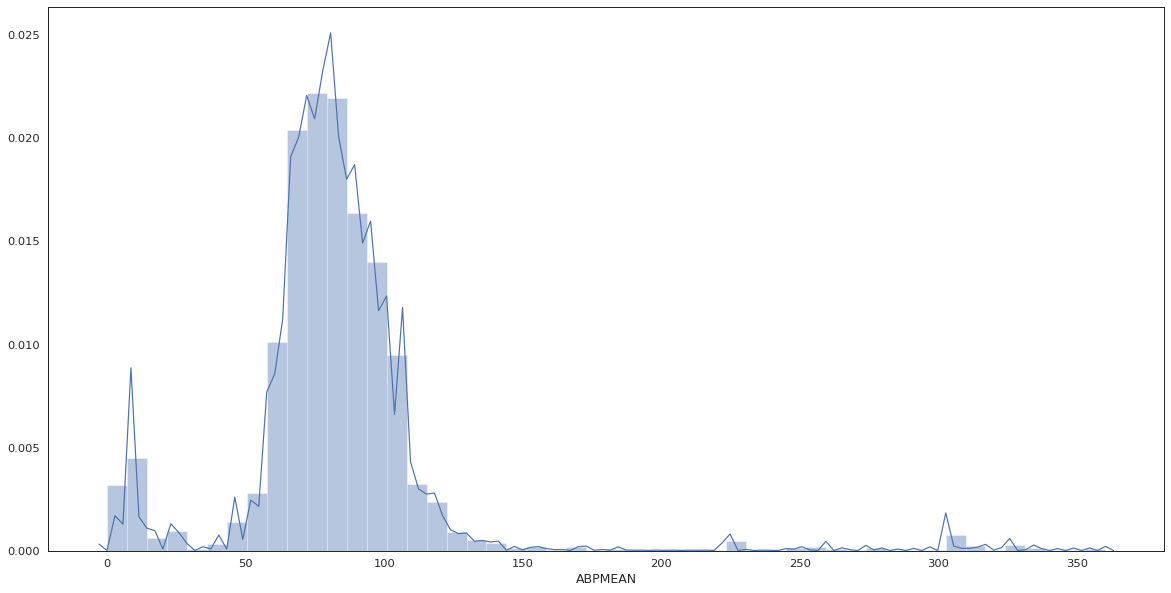

In [ ]:
# For checking distribution of ABPMEAN

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_ABPMEAN = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['ABPMEAN']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_ABPMEAN.ABPMEAN)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_ABPMEAN.ABPMEAN);

print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPMEAN.ABPMEAN)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_ABPMEAN.ABPMEAN)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 125.45846781654663
Skewness of  distribution: -8.37562197918289


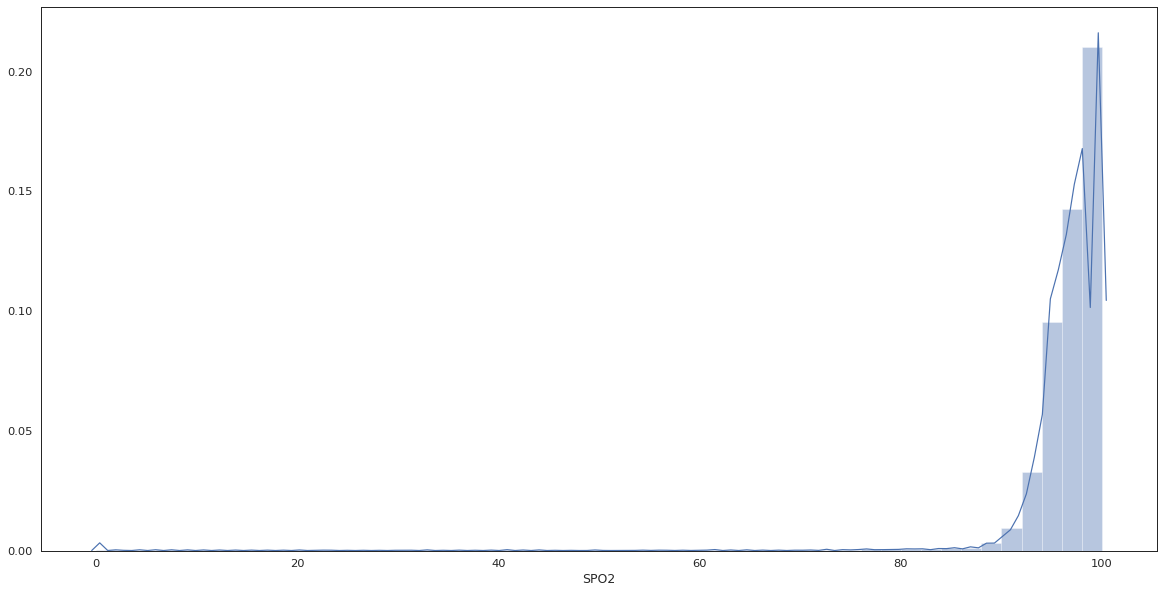

In [ ]:
# For checking distribution of SPO2

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_SPO2 = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['SPO2']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_SPO2.SPO2)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_SPO2.SPO2);

print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_SPO2.SPO2)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_SPO2.SPO2)))

p=0.000
Data does not look Gaussian (reject H0)
Kurtosis of  distribution: 812.981006046951
Skewness of  distribution: -4.623016405059363


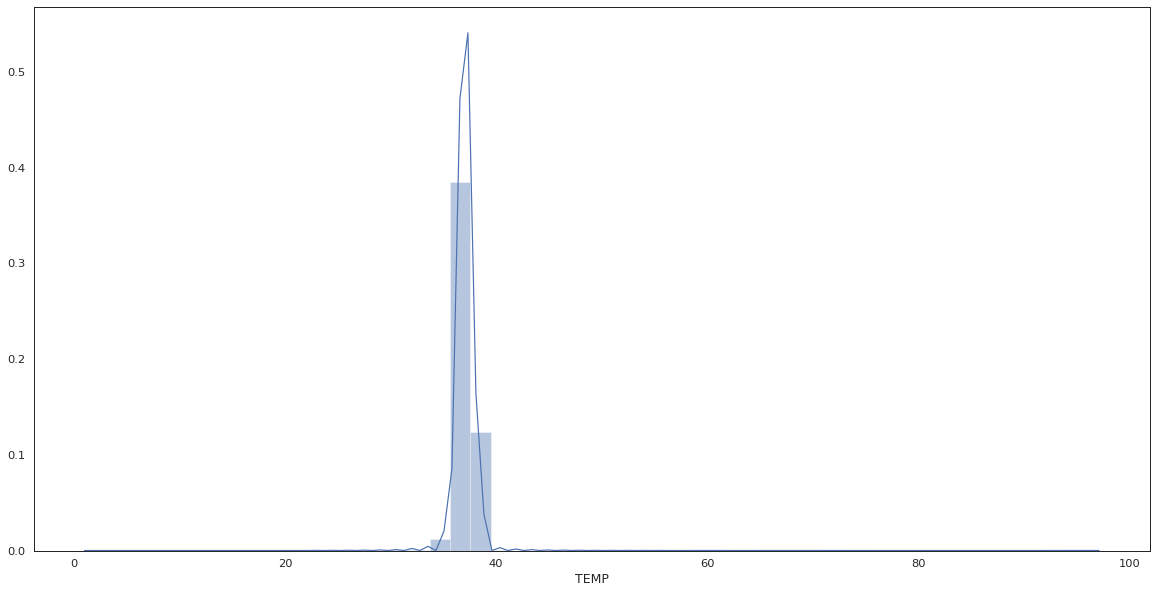

In [ ]:
# For checking distribution of TEMP

from scipy import stats
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

df_all404_withTemp_cleaned_MVimputed_TEMP = df_all404_withTemp_cleaned_MVimputed.dropna(subset=['TEMP']) 
stat, p = stats.normaltest(df_all404_withTemp_cleaned_MVimputed_TEMP.TEMP)

print('p=%.3f' %  p)

alpha = 0.05
if p > alpha:
   print('Data looks Gaussian (fail to reject H0)')
else:
   print('Data does not look Gaussian (reject H0)')

sns.distplot(df_all404_withTemp_cleaned_MVimputed_TEMP.TEMP);

print('Kurtosis of  distribution: {}'.format(stats.kurtosis
                                                      (df_all404_withTemp_cleaned_MVimputed_TEMP.TEMP)))
print('Skewness of  distribution: {}'.format(stats.skew
                                                      (df_all404_withTemp_cleaned_MVimputed_TEMP.TEMP)))